This is one of the most important steps in machine learning! You must 

*   List item
*   List item

understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "BostonData.csv". This file contains 506 house details from the Boston city.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

**Data description**

*The business meaning of each column in the data is as below*

*   CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS - proportion of non-retail business acres per town.
*   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*   NOX - nitric oxides concentration (parts per 10 million)
*   RM - average number of rooms per dwelling
*   AGE - proportion of owner-occupied units built prior to 1940
*   DIS - weighted distances to five Boston employment centres
*   RAD - index of accessibility to radial highways
*   TAX - full-value property-tax rate per 10,000 dollars
*   PTRATIO - pupil/teacher ratio by town
*   B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT - % lower status of the population
*   MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
# Reading the dataset
import pandas as pd
import numpy as np
BostonData=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/colab datas/Boston.csv')
print('Shape before deleting duplicate values:', BostonData.shape)

# Removing duplicate rows if any
BostonData=BostonData.drop_duplicates()
print('Shape After deleting duplicate values:', BostonData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
BostonData.head(10)

# Defining the problem statement:
##  Create a ML model which can predict the price( MEDV ) of a house
*  Target Variable: MEDV
*	 Predictors: CRIM, ZN, INDUS, CHASd, NOX, RM, etc.
## Determining the type of Machine Learning
*  Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.
## Looking at the distribution of Target variable
*  If target variable's distribution is too skewed then the predictive modeling will not be possible.
*  Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.


In [ ]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
BostonData['medv'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

## Basic Data Exploration
### This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

### This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, does this column affect the price of the house? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

### There are four commands which are used for Basic data exploration in Python

*   head() : This helps to see a few sample rows of the data
*   info() : This provides the summarized information of the data
*   describe() : This provides the descriptive statistical details of the data
*   nunique(): This helps us to identify if a column is categorical or continuous

In [ ]:
# Looking at sample rows in the data
BostonData.head()

In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
BostonData.info()

In [ ]:
# Looking at the descriptive statistics of the data
BostonData.describe(include='all')

In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
BostonData.nunique()

#Basic Data Exploration Results
###Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

###The selected columns in this step are not final, further study will be done and then a final list will be created

*  CRIM - Continuous. Selected.
*  ZN - Continuous. Selected.
*  INDUS - Continuous. Selected.
*  CHAS - Categorical. Selected.
*  NOX - Continuous. Selected.
*  RM - Continuous. Selected.
*  AGE - Continuous. Selected.
*  DIS - Continuous. Selected.
*  RAD - Categorical. Selected.
*  TAX - Continuous. Selected.
*  PTRATIO - Continuous. Selected.
*  B - Continuous. Selected.
*  LSTAT - Continuous. Selected.
*  MEDV - Continuous. Selected. This is the Target Variable!

# Visual Exploratory Data Analysis

*   Categorical variables: Bar plot
*   Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plot

We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted two categorical predictors in the data

**Categorical Predictors:**

'CHAS', 'RAD'

We use bar charts to see how the data is distributed for these categorical columns.



In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

In [ ]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=BostonData, colsToPlot=['chas','rad'])

#Bar Charts Interpretation
###These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

###In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

###If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

###In this data, "CHAS" is skewed. There is just one bar which is dominating and other one have very less rows. Such columns may not be correlated with the target variable because there is no information to learn. The algorithms cannot find any rule like when the value is this then the target variable is that.

###Whenever in doubt, always investigate the column further.

## **Selected Categorical Variables:** Both the categorical variables are selected for further analysis.

###  'CHAS', 'RAD'

#Visualize distribution of all the Continuous Predictor variables in the data using histograms
### Based on the Basic Data Exploration, there are eleven continuous predictor variables 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', and 'LSTAT'.

In [ ]:
# Plotting histograms of multiple columns together
BostonData.hist(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax',
                 'ptratio', 'black', 'lstat'], figsize=(18,10))

#Histogram Interpretation
## Histograms shows us the data distribution for a single continuous variable.

### The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "AGE", there are around 200 rows in data that has age value between 90 to 100.

### The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

## **Selected Continuous Variables:**

*   CRIM : Selected. Outliers seen beyond 40, need to treat them.
*   ZN : Selected. The distribution is good.
*   INDUS : Selected. The distribution is good.
*   NOX : Selected. The distribution is good.
*   RM : Selected. The distribution is good.
*   AGE : Selected. The distribution is good.
*   DIS : Selected. The distribution is good.
*   TAX : Selected. The distribution is good.
*   PTRATIO : Selected. The distribution is good.
*   Black: Selected. The distribution is good.
*   LSTAT: Selected. The distribution is good.

#Outlier treatment
###Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

##Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

##Why I should treat the outliers?

##Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

##There are below two options to treat outliers in the data.

*   Option-1: Delete the outlier Records. Only if there are just few rows lost.
*   Option-2: Impute the outlier values with a logical business value
*   Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

###Replacing outliers for 'CRIM'

In [ ]:
# Finding nearest values to 60 mark
BostonData['crim'][BostonData['crim']<60].sort_values(ascending=False)

Above result shows the nearest logical value is 51.13, hence, replacing any value above 60 with it.

In [ ]:
 # Replacing outliers with nearest possibe value
BostonData['crim'][BostonData['crim']>60] =51.13

#Visualizing distribution after outlier treatment
### The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

In [ ]:
BostonData.hist(['crim'], figsize=(18,5))


#Missing values treatment
##Missing values are treated for each column separately.

##If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

##There are below options for treating missing values in data.

*  Delete the missing value rows if there are only few records
*  Impute the missing values with MEDIAN value for continuous variables
*  Impute the missing values with MODE value for categorical variables
*  Interpolate the values based on nearby values
*  Interpolate the values based on business logic

In [ ]:
BostonData.shape

In [ ]:
X=BostonData.iloc[:,:-1]
Y=BostonData['medv']
X.head()


In [ ]:
Y.head()

No missing values in this data!!


In [ ]:
'''from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
f_selector = SelectKBest(score_func=chi2, k=13)
f_selector.fit(X,Y)


dfscore=pd.Dataframe(order.score_)
feature_rank.nlargest(10,'score')
'''

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
# feature selection

f_selector = SelectKBest(score_func=f_regression, k=13)
# Plot the scores for the features
f_selector.fit(X,Y)

plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")

plt.ylabel("F-value (transformed from the correlation values)")
plt.show()




In [ ]:
BostonData.isnull().sum()

BostonData.isnull().sum()
#these are selected columns at first
#SelectedColumns=['rm', 'ptratio','lstat', 'rad', 'zn']
#new selected columns
SelectedColumn=[# Separate Target Variable and Predictor Variables
TargetVariable='medv'
Predictors=['crim', 'indus', 'rm', 'rad', 'tax', 'ptratio', 'lstat']
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
print(PredictorScalerFit)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
print(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)]

In [ ]:
'''dfscore=pd.DataFrame(f_selector.scores_,columns=['Scores'])
dfcolumn=pd.DataFrame(X.columns)
featurerank=pd.concat([dfscore,dfcolumn],axis=1)
featurerank.columns=['features','scores']
featurerank.nlargest(10,'Scores')'''


In [ ]:
# performing transformation for skewed datas
#SelectedColumns=['crim','indus','rm','age','rad','tax','ptratio','lstat']
# Plotting histograms of multiple columns together
BostonData.hist(['crim','indus','rm','age','rad','tax','ptratio','lstat'], figsize=(18,10))

# performing transformation for skewed datas
#SelectedColumns=['crim','indus','rm','age','rad','tax','ptratio','lstat'] 



In [ ]:
import scipy.stats as stats
import pylab
def plotdata(BostonData,features):
  plt.subplot(1,2,1)
  BostonData[features].hist()
  plt.subplot(1,2,2)
  stats.probplot(BostonData[features],dist='norm',plot=pylab)


For **AGE**

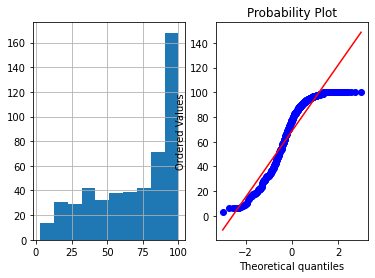

In [ ]:
#no transformation
Bd=BostonData
Bd['Age']=Bd.age
plotdata(Bd,'Age')

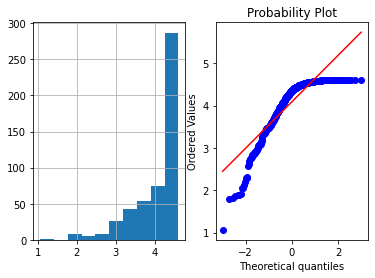

In [ ]:
#logarthmic Transformation
Bd['Age_log']=np.log(Bd['age'])
plotdata(Bd,'Age_log')

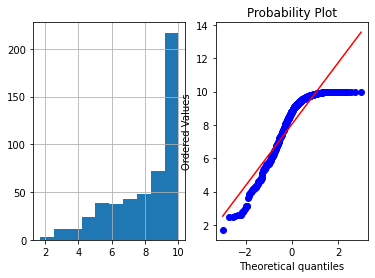

In [ ]:
#Square root
Bd['Age_squ']=Bd.age**(1/2)
plotdata(Bd,'Age_squ')

In [ ]:
#Exponential Transformation
Bd['Age_exp']=Bd.age**(1/1.2)
plotdata(Bd,'Age_exp')

In [ ]:
#Reciprocal Transformation
Bd['Age_rec']=1/Bd.age
plotdata(Bd,'Age_rec')

In [ ]:
#box cox Transformation
Bd['Age_box'],param=stats.boxcox(Bd['age'])
plotdata(Bd,'Age_box')

# For TAX


In [ ]:
#no Transformation(TAX)
Bd['Tax']=Bd.tax
plotdata(Bd,'Tax')


In [ ]:
#Reciprocal Transformation
Bd['tax_rec']=1/Bd.tax
plotdata(Bd,'tax_rec')

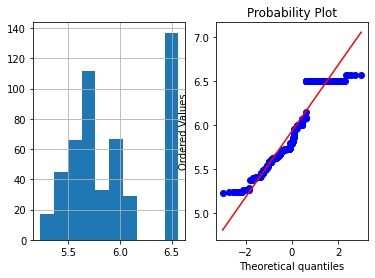

In [ ]:
#logarthmic Transformation
Bd['tax_log']=np.log(Bd['tax'])
plotdata(Bd,'tax_log')

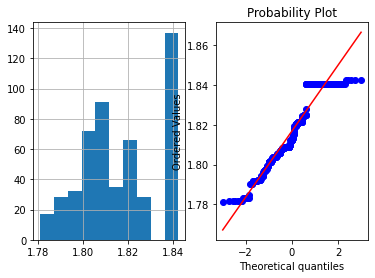

In [ ]:
#boxcox transformation
Bd['tax_box'],param=stats.boxcox(Bd['tax'])
plotdata(Bd,'tax_box')

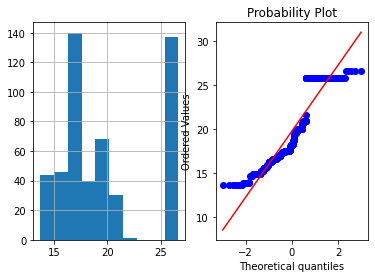

In [ ]:
#Square root
Bd['tax_squ']=Bd.tax**(1/2)
plotdata(Bd,'tax_squ')

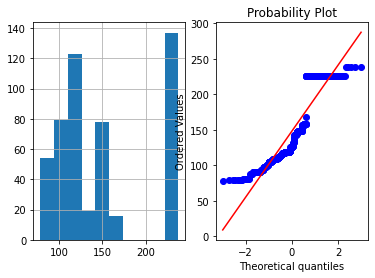

In [ ]:
#Exponential Transformation
Bd['tax_exp']=Bd.tax**(1/1.2)
plotdata(Bd,'tax_exp')

**For INDUS**


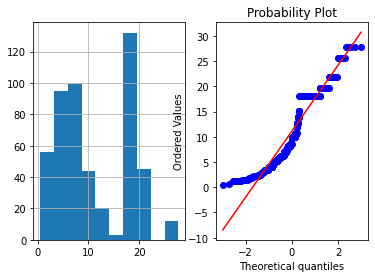

In [ ]:
# no transformation
Bd['indus']=Bd.indus
plotdata(Bd,'indus')

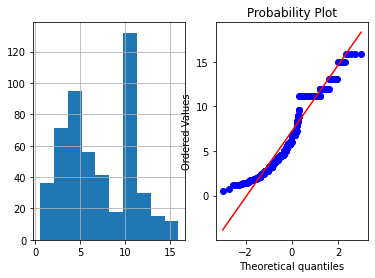

In [ ]:
#Exponential Transformation
Bd['indus_exp']=Bd.indus**(1/1.2)
plotdata(Bd,'indus_exp')

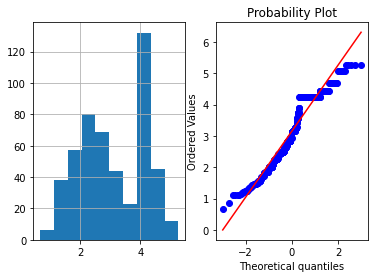

In [ ]:
#Square root
Bd['indus_squ']=Bd.indus**(1/2)
plotdata(Bd,'indus_squ')

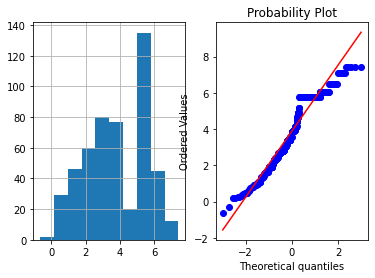

In [ ]:
#boxcox transformation
Bd['indus_box'],param=stats.boxcox(Bd['indus'])
plotdata(Bd,'indus_box')

**For Ptratio**

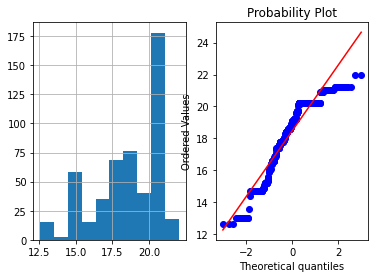

In [ ]:
#boxcox transformation
Bd['ptratio']=Bd['ptratio']
plotdata(Bd,'ptratio')

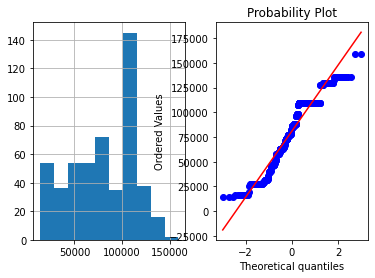

In [ ]:
#boxcox transformation
Bd['ptratio_box'],param=stats.boxcox(Bd['ptratio'])
plotdata(Bd,'ptratio_box')

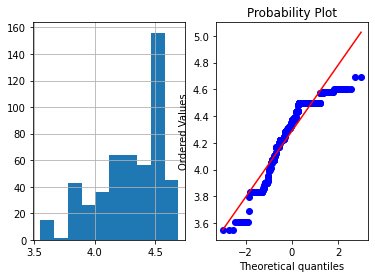

In [ ]:
#Square root
Bd['ptratio_squ']=Bd.ptratio**(1/2)
plotdata(Bd,'ptratio_squ')

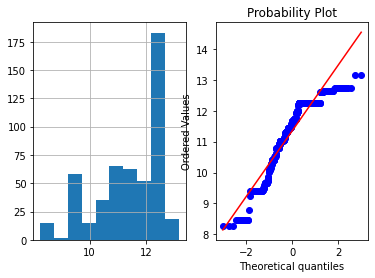

In [ ]:
#Exponential Transformation
Bd['ptratio_exp']=Bd.ptratio**(1/1.2)
plotdata(Bd,'ptratio_exp')

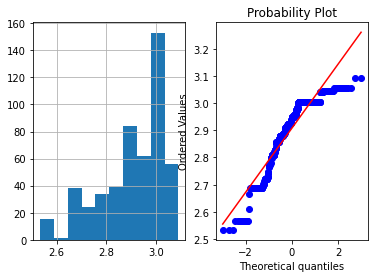

In [ ]:
#logarthmic Transformation
Bd['ptratio_log']=np.log(Bd['ptratio'])
plotdata(Bd,'ptratio_log')

**Fro Lstat**

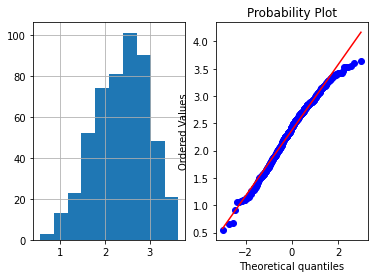

In [ ]:
#no Transformation
Bd['lstat']=np.log(Bd['lstat'])
plotdata(Bd,'lstat')

**For  Rad**

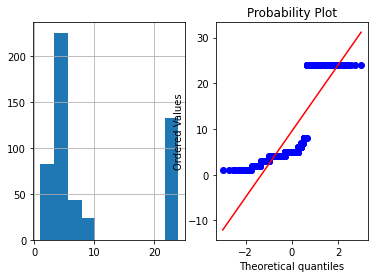

In [ ]:
# no Transformation
Bd['rad']=Bd['rad']
plotdata(Bd,'rad')

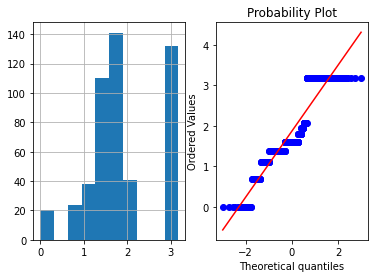

In [ ]:
#logarthmic Transformation
Bd['rad_log']=np.log(Bd['rad'])
plotdata(Bd,'rad_log')

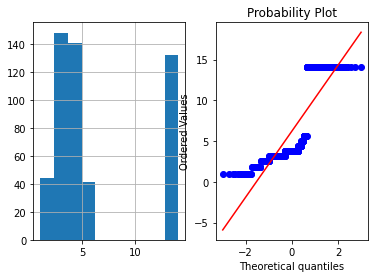

In [ ]:
#Exponential Transformation
Bd['rad_exp']=Bd.rad**(1/1.2)
plotdata(Bd,'rad_exp')

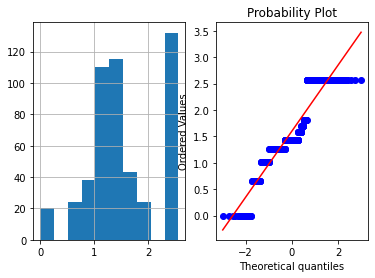

In [ ]:
#boxcox transformation
Bd['rad_box'],param=stats.boxcox(Bd['rad'])
plotdata(Bd,'rad_box')

In [ ]:
Bd.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Age,Age_log,Age_squ,Age_exp,Age_rec,Age_box,Tax,tax_rec,tax_log,tax_box,tax_squ,tax_exp,indus_exp,indus_squ,indus_box,ptratio_box,ptratio_squ,ptratio_exp,ptratio_log,rad_log,rad_exp,rad_box
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.461268,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,2.370965,22.532806,68.574901,4.090803,8.044595,33.405934,0.021837,225.019015,408.237154,0.002859,5.931405,1.816844,19.799314,148.206407,7.240003,3.155005,3.886153,80967.060827,4.288169,11.341545,2.907914,1.867661,6.224248,1.600276
std,7.421382,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,0.600891,9.197104,28.148861,0.610740,1.966478,12.064202,0.026278,112.342684,168.537116,0.001049,0.396367,0.017253,4.031928,50.844891,3.858553,1.088606,1.878065,34236.431741,0.259375,1.120052,0.124821,0.874833,4.792251,0.665761
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,0.548121,5.000000,2.900000,1.064711,1.702939,2.428464,0.010000,2.364168,187.000000,0.001406,5.231109,1.781147,13.674794,78.199025,0.523558,0.678233,-0.659680,14071.197740,3.549648,8.259913,2.533697,0.000000,1.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,1.938729,17.025000,45.025000,3.807217,6.710066,23.871410,0.010630,122.408268,279.000000,0.001502,5.631212,1.804238,16.703293,109.144914,3.944326,2.278157,2.400241,57298.595443,4.171331,10.809137,2.856470,1.386294,3.174802,1.258874
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,2.430097,21.200000,77.500000,4.350275,8.803401,37.533398,0.012903,254.422293,330.000000,0.003030,5.799093,1.812571,18.165902,125.534072,6.636460,3.112876,3.860232,84982.353494,4.364627,11.656789,2.947064,1.609438,3.823622,1.439431
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,2.830563,25.000000,94.075000,4.544092,9.699227,44.112518,0.022210,330.186080,666.000000,0.003584,6.501290,1.840450,25.806976,225.369526,11.170317,4.254409,5.773945,109659.937917,4.494441,12.240321,3.005683,3.178054,14.131102,2.559899
max,51.135800,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,3.636796,50.000000,100.000000,4.605170,10.000000,46.415888,0.344828,358.441918,711.000000,0.005348,6.566672,1.842560,26.664583,237.989612,15.943685,5.266878,7.412637,158970.473891,4.690416,13.142729,3.091042,3.178054,14.131102,2.559899


# Selecting final predictors for Machine Learning
## Based on the satistcal tests, selecting the final columns for machine learning (will be explaied latter)

In [ ]:
#SelectedColumns=['rm', 'ptratio','lstat', 'rad', 'zn']
#SelectedColumns=['crim','indus','rm','age','rad','tax','ptratio','lstat']
SelectedColumns=['indus_squ','rm','Age_exp','rad_box','tax_box','ptratio','lstat']

# Selecting final columns
DataForML=Bd[SelectedColumns]
DataForML.head()

,indus_squ,rm,Age_exp,rad_box,tax_box,ptratio,lstat
0,1.519868,6.575,32.499224,0.000000,1.807258,15.3,1.605430
1,2.658947,6.421,38.097590,0.660260,1.796577,17.8,2.212660
2,2.658947,7.185,30.787022,0.660260,1.796577,17.8,1.393766
3,1.476482,6.998,24.213332,1.017528,1.791645,18.7,1.078410
4,1.476482,7.147,27.861174,1.017528,1.791645,18.7,1.673351


# Data Pre-processing for Machine Learning
## List of steps performed on predictor variables before data can be used for machine learning

1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

## Converting the nominal variable to numeric using get_dummies()

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['medv']=Bd['medv']

# Printing sample rows
DataForML_Numeric.head()

,indus_squ,rm,Age_exp,rad_box,tax_box,ptratio,lstat,medv
0,1.519868,6.575,32.499224,0.000000,1.807258,15.3,1.605430,24.0
1,2.658947,6.421,38.097590,0.660260,1.796577,17.8,2.212660,21.6
2,2.658947,7.185,30.787022,0.660260,1.796577,17.8,1.393766,34.7
3,1.476482,6.998,24.213332,1.017528,1.791645,18.7,1.078410,33.4
4,1.476482,7.147,27.861174,1.017528,1.791645,18.7,1.673351,36.2


#Machine Learning: Splitting the data into Training and Testing sample
### We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['indus_squ', 'rm', 'Age_exp', 'rad_box', 'tax_box', 'ptratio', 'lstat',
       'medv'],
      dtype='object')

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='medv'
Predictors=['indus_squ', 'rm', 'Age_exp', 'rad_box', 'tax_box', 'ptratio', 'lstat']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=428)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(455, 7)
(455,)
(51, 7)
(51,)


#Standardization/Normalization of data
###You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

###However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [ ]:
'''# Separate Target Variable and Predictor Variables
TargetVariable='medv'
Predictors=['crim','indus','rm','age','rad','tax','ptratio','lstat']
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
print(PredictorScalerFit)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
print(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)'''

"# Separate Target Variable and Predictor Variables\nTargetVariable='medv'\nPredictors=['crim','indus','rm','age','rad','tax','ptratio','lstat']\nX=DataForML_Numeric[Predictors].values\ny=DataForML_Numeric[TargetVariable].values\n### Sandardization of data ###\nfrom sklearn.preprocessing import StandardScaler, MinMaxScaler\n# Choose either standardization or Normalization\n# On this data Min Max Normalization produced better results\n\n# Choose between standardization and MinMAx normalization\n#PredictorScaler=StandardScaler()\nPredictorScaler=MinMaxScaler()\n\n# Storing the fit object for later reference\nPredictorScalerFit=PredictorScaler.fit(X)\nprint(PredictorScalerFit)\n# Generating the standardized values of X\nX=PredictorScalerFit.transform(X)\nprint(X)\n# Split the data into training and testing set\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)"

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='medv'
Predictors=['indus_squ', 'rm', 'Age_exp', 'rad_box', 'tax_box', 'ptratio', 'lstat']
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Z score Normalization produced better results

# Choose between standardization and MinMAx normalization

PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
print(PredictorScalerFit)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
print(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[-1.50353344  0.41367189 -0.07523137 ... -0.55619649 -1.45900038
  -1.27526026]
 [-0.45613306  0.19427445  0.38927557 ... -1.17588183 -0.30309415
  -0.26371064]
 [-0.45613306  1.28271368 -0.21729607 ... -1.17588183 -0.30309415
  -1.62785808]
 ...
 [ 0.27491478  0.98496002  0.7883734  ... -0.79719962  1.17646583
  -1.06793936]
 [ 0.27491478  0.72567214  0.73286327 ... -0.79719962  1.17646583
  -0.83665988]
 [ 0.27491478 -0.36276709  0.4525837  ... -0.79719962  1.17646583
  -0.51080901]]


In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 7)
(354,)
(152, 7)
(152,)


#Multiple Linear Regression

In [ ]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
# mean absolute percentage error MAPE
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['medv']-TestingDataResults['Predictedmedv']))/TestingDataResults['medv'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation 
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , Y, cv=15, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2)) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Value: 0.761306137735412

##### Model Validation and Accuracy Calculations ##########
   medv  Predictedmedv
0  23.2           23.0
1  22.1           28.0
2  20.6           24.0
3  17.8           15.0
4  41.7           46.0
Mean Accuracy on test data: 81.88214419436395
Median Accuracy on test data: 85.7795172863666

Accuracy values for 10-fold Cross Validation:
 [88.35367618 86.72330518 91.35102805 89.26891219 79.61270361 87.47738702
 84.66096169 87.4230104  89.12901485 84.3645385  73.91891429 53.05515675
 60.53737685 82.58938408 82.61437959]

Final Average Accuracy of the model: 81.41


In [ ]:

from sklearn.metrics import mean_squared_error, r2_score


from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X_train)
LRpoly = LinearRegression()
LRpoly1=LRpoly.fit(X_poly,y_train)
Y_trainpoly_pred=LRpoly1.predict(X_poly)
y_test_predict = LRpoly1.predict(poly_features.fit_transform(X_test))

#rmse=np.sqrt(y_train,Y_poly_pred)
r2 = r2_score(y_train,Y_trainpoly_pred)
#print("poly rmse =", rmse)
print("poly R2=",r2)

#plt.scatter(X, y, s=10)

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('PredictedPoly'+TargetVariable)]=np.round(y_test_predict)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'PredictedPoly'+TargetVariable]].head())

# Calculating the error for each row
# mean absolute percentage error MAPE
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['medv']-TestingDataResults['PredictedPolymedv']))/TestingDataResults['medv'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation 
from sklearn.metrics import make_scorer
scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
def create_polynomial_regression_model(degree):
 poly_features = PolynomialFeatures(degree=degree)
 X_poly = poly_features.fit_transform(X)
 poly = LinearRegression()
 return np.mean(cross_val_score(poly, X_poly, Y, cv=15, scoring=scoring))
poly_cv = []
for i in range(1,4):
 poly_cv.append(create_polynomial_regression_model(i))
 cv=create_polynomial_regression_model(i)
 print("degree=", i, 'cv=',cv)


poly R2= 0.9176141681676383

##### Model Validation and Accuracy Calculations ##########
   medv  PredictedPolymedv
0  23.2               21.0
1  22.1               22.0
2  20.6               23.0
3  17.8               17.0
4  41.7               39.0
Mean Accuracy on test data: 84.79869554044585
Median Accuracy on test data: 89.90773463627522
degree= 1 cv= 81.40531661426299
degree= 2 cv= 81.56880505626789
degree= 3 cv= 65.9085839402107


## **SVR is a bit different from SVM. As the name suggest the SVR is an regression algorithm , so we can use SVR for working with continuous Values instead of Classification which is SVM**

In [ ]:
#RBF Kernal
#from sklearn.svm import SVC
from sklearn.metrics import SCORERS
from sklearn.svm import SVR
svr = SVR()
classifier = SVR(kernel = 'rbf')
classifier.fit(X_train, y_train)

Y_Pred = classifier.predict(X_test)
y = Y_Pred

In [ ]:
y

array([22.64967845, 23.9251964 , 21.82226092, 16.36988666, 33.98343852,
       14.21070328, 20.9544602 , 30.47968842, 33.28355437, 34.18679229,
       12.11493391, 29.30029484, 21.39062231, 22.16085232, 20.64946318,
       20.30897884, 31.02655699, 29.88927005, 25.34111916, 27.75350127,
       16.8413676 , 14.39259982, 25.3121104 , 23.55550832, 11.08277517,
       20.82476982, 33.01233844, 25.83093823, 24.4285546 , 25.15391141,
       14.85529919, 15.38179714, 15.33116414, 20.83991869, 17.66991419,
       35.23973327, 22.06113368, 27.60482706, 16.72826452, 31.63714872,
       16.70604004, 11.68106296, 16.75311829, 19.13195683, 27.06963521,
       21.15317099, 17.8669316 , 21.16663174, 12.33757661, 36.00219393,
       20.39359916, 14.1964528 , 17.26714593, 15.35443586, 20.84882604,
       27.08485157, 11.68616276, 21.22305249, 18.19719824, 17.72726987,
       18.71260177, 23.86672557, 26.24118596, 32.57303245, 25.85609084,
       24.71536639, 15.3025131 , 12.89870856, 31.46240462, 13.92

In [ ]:


from sklearn.metrics import SCORERS
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, svr.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
# mean absolute percentage error MAPE
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['medv']-TestingDataResults['Predictedmedv']))/TestingDataResults['medv'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation 
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(svr, X , Y, cv=15, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2)) 